# Q* Learning 
<br> 
In this notebook, we'll implement an agent <b>that plays FrozenLake.</b>
<img src="frozenlake.png" alt="Frozen Lake"/>

The goal of this game is <b>to go from the starting state (S) to the goal state (G)</b> by walking only on frozen tiles (F) and avoid holes (H).However, the ice is slippery, <b>so you won't always move in the direction you intend (stochastic environment)</b>

## Step 0: Import the dependencies
We use 3 libraries:
- `Numpy` for our Qtable
- `OpenAI Gym` for our FrozenLake Environment
- `Random` to generate random numbers

In [2]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

## Step 1: Create the environment
- Here we'll create the FrozenLake environment. 
- OpenAI Gym is a library <b> composed of many environments that we can use to train our agents.</b>
- In our case we choose to use Frozen Lake.
- Note that S is the subject, F is frozen, H is the hole, and G the goal.

In [3]:
env = gym.make("FrozenLake-v1")
env.render()


SFFF
FHFH
FFFH
HFFG


## Step 2: Create the Q-table and initialize it
- Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size
- OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

In [4]:
action_size = env.action_space.n
state_size = env.observation_space.n
print("state size : ", state_size)
print("action size :" , action_size)

# 4 actions : left , down ,right ,up
# 16 states : every state is different from the other 

state size :  16
action size : 4


In [5]:
# Complete the code to create the qtable from the action_size and state_size
qtable = np.zeros((state_size,action_size)) # 16 rows (states) , 4 Columns (cause of the 4 actions avalaible)
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


**4 states : F , H , G , Initial S** \
**4 actions** 


## Step 3: Create the hyperparameters
- Here, we'll specify the hyperparameters
- Comment about the impact of each parameter in the learning process. You can run again the notebook for different configurations.

In [6]:
total_episodes = 15000  # Total of simulations  
learning_rate = 0.8           
max_steps = 99  # Numbers of the agent's steps allowed in the envirionnement               
gamma = 0.95                  

epsilon = 0.5    # exploration or explotation          
max_epsilon = 1.0             
min_epsilon = 0.01            
decay_rate = 0.005            

In [7]:
# Write your comments in this cell:
'''
All the following parameters are needed to implement the q learning algorithm 

Total episodes ==> the amount of simulations in the training process for our agent in the Frozen lake environnement

max_steps ==> Numbers of the agent's steps allowed in the envirionnement    

Learning rate ==> number between 0 and 1 . Can be thought as how quickly the agent abandons the previous q value for the new one 
(for a given state/action pair)

gamma ==> discount rate . Rate for which we discount futur rewards and will determine the present value of futur rewards

epsilon ==> Also called the exploration rate  , probability about making exploration or exploitation. Is sets to '1' so the agent will start exploring
the environnement. As the agent learn more about the environnement in each new episode , epsilon will decay by some rate so that exploration 
become less and less probable 

max_epsilon and min_epsilon :  bounds -> how large and how small the exploration rate (epsilon) can be 

Decay rate ==> Rate at whitch epslion will decay
 
 '''

# Decay ==> déclin / decroit

"\nAll the following parameters are needed to implement the q learning algorithm \n\nTotal episodes ==> the amount of simulations in the training process for our agent in the Frozen lake environnement\n\nmax_steps ==> Numbers of the agent's steps allowed in the envirionnement    \n\nLearning rate ==> number between 0 and 1 . Can be thought as how quickly the agent abandons the previous q value for the new one \n(for a given state/action pair)\n\ngamma ==> discount rate . Rate for which we discount futur rewards and will determine the present value of futur rewards\n\nepsilon ==> Also called the exploration rate  , probability about making exploration or exploitation. Is sets to '1' so the agent will start exploring\nthe environnement. As the agent learn more about the environnement in each new episode , epsilon will decay by some rate so that exploration \nbecome less and less probable \n\nmax_epsilon and min_epsilon :  bounds -> how large and how small the exploration rate (epsilon) c

## Step 4: The Q learning algorithm
- Now we implement the Q learning algorithm:

In [8]:
# Step 1 --> Q-values are already initialized.

# List of rewards we'll get from each episodes
rewards = []

# Step 2 --> For life or until learning is stopped ...
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    
    done = False # the done variable just keeps track of whether or not the episode is finished 
    # We initialize it to false when we first start the episode 
    
    total_rewards = 0 # Each epiosde starts with no rewards 

    
    for step in range(max_steps): 
        # Step 3 --> Choose an action (a) in the current world state (s)
        ## First we randomize a number
        
        
        exp_exp_tradeoff = random.uniform(0,1) # Random - between 0 and 1 . Will be used to determine whether or not
        # the agent will explore or exloit the environnement in this time step 

        # eps is initialy sets to 1 
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for the current state)
        if exp_exp_tradeoff > epsilon: 
            action = np.argmax(qtable[state]) 
            
            
        
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample() # exploring the environnement and sample an action randomly 
            
            # Random actions are set with the following command  : env.action_space.sample()

        
        # Step 4 --> Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action) # use the method step from env. Check gym library documentation.

        # step returns a tuple containing  : 
        # - The new state 
        # - The reward for the action we took 
        # - whether or not our action ended our episode 
        # - Some diagnostic info regarding our environnement
        
        
        
        # Step 5 --> Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        
        
        #Bellman's equation : 
        
        qtable[state, action] = qtable[state, action] + learning_rate *(reward + gamma*np.max(qtable[new_state]) - qtable[state, action])
        
        #the new q value for this "state/action" pair, is a weighted sum of out old values and learn values 
        # 
        # Learn values :  learning_rate *(reward + gamma*np.max(qtable[new_state, :]) - qtable[state, action])
        
        
        total_rewards += reward


        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            break
        
    # Reduce epsilon 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
    # Why do we need to reduce the epsilon? Comment below:
    '''
    Write your answer here:
     the more epsilon is small , the more the condition exp_exp_tradeoff > epsilon will be verified , which leads to more exploitation from 
     the agent and less exploration , of our environnement.

     if for instance we decide to define epsilon as equal to 0.5 ,  we'll observe in Step 5 that the agent will  ends up to the goal five times in
     a row.
    
    '''
   

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

#  Epsilon will decrease as the agent evolve throught the environnement during the severals epiosdes
# As epsilon decrease , we will have more chance to avec tradeoff > epsilon , so more exploitation as we learn of the environnement
# Principe of the "apprentissage par renforcement"

Score over time: 0.4660666666666667
[[4.44396227e-01 7.35355072e-03 7.40322777e-03 1.38931236e-02]
 [1.01612680e-04 1.87391530e-04 2.59414318e-05 3.86557465e-02]
 [6.80060804e-04 1.92746543e-03 1.09189374e-03 7.02107342e-03]
 [7.01953981e-04 2.20036014e-04 7.67445361e-04 7.22113981e-03]
 [2.83551193e-01 6.02100455e-03 2.11194642e-03 6.38495863e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06255085e-05 7.41143369e-02 6.46964165e-06 6.69511892e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.75428970e-03 2.28351249e-03 3.99284027e-03 2.43091571e-01]
 [1.20084524e-02 2.64492377e-03 1.34817902e-01 2.46398996e-03]
 [6.76196167e-01 2.77473226e-04 1.40227280e-04 1.23716631e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.64343029e-02 3.08653262e-02 7.15919248e-01 4.91121728e-02]
 [1.38042707e-01 9.59749405e-01 1.25157041e-01 1.18111599e-01]
 [0.00000000e+00 0.

## Step 5: Use our Q-table to play FrozenLake! 
- After 10 000 episodes, our Q-table can be used as a "cheatsheet" to play FrozenLake"
- By running this cell you can see our agent playing FrozenLake.
- Evaluate how the reward evolves in each step and comment about it.

In [9]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):  
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state]) #qtable defined in the previous question after 10.000 episodes 
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state




****************************************************
EPISODE  0
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 21
****************************************************
EPISODE  1
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 14
****************************************************
EPISODE  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 15
****************************************************
EPISODE  3
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 18
****************************************************
EPISODE  4
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 19


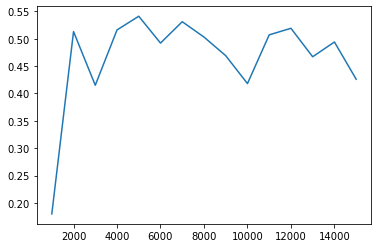

In [17]:
# Write here your code to evaluate the evolution of the reward in each step.

# type(rewards) --> list 
# len(rewards) --> 6856 elements 

# Average rewards each 1000 episodes 

Rewards_per_episode  = np.split(np.array(rewards) , total_episodes/1000)
count = 1000
V = np.zeros(15)
i = 0 
for k in Rewards_per_episode : 
    V[i] = str(sum(k/1000))
    count+= 1000
    i+= 1 


Epi = np.linspace(1000,15000,15)  

plt.plot(Epi,V)

In [37]:
# Write your comments in this cell
'''
The average reward will oscillate between a certain domain after 

'''

'\n\n\n'